<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Churn-Prediction-IBM-telco/blob/main/EDA_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('Eda_data.xlsx')
print(df.head())

        State         City  Zip Code   Latitude   Longitude  Gender  \
0  California  Los Angeles     90003  33.964131 -118.272783    Male   
1  California  Los Angeles     90005  34.059281 -118.307420  Female   
2  California  Los Angeles     90006  34.048013 -118.293953  Female   
3  California  Los Angeles     90010  34.062125 -118.315709  Female   
4  California  Los Angeles     90015  34.039224 -118.266293    Male   

  Senior Citizen Partner Dependents  Tenure Months  ... Tech Support  \
0             No      No         No              2  ...           No   
1             No      No        Yes              2  ...           No   
2             No      No        Yes              8  ...           No   
3             No     Yes        Yes             28  ...          Yes   
4             No      No        Yes             49  ...           No   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Month-to-month               Yes   
1 

Lets take a Look at the total churn count among 7032 customers

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64


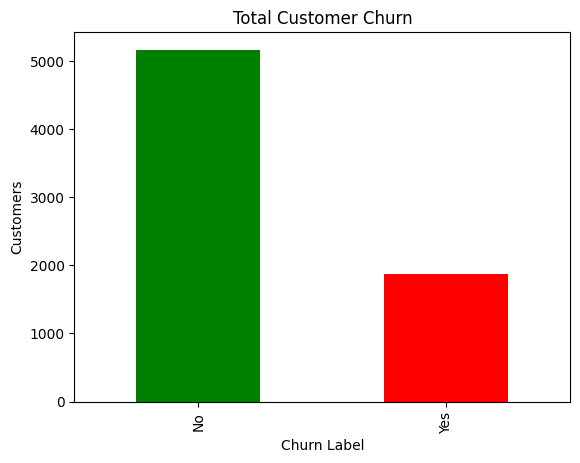

In [21]:
df['Churn Label'].value_counts().plot(kind='bar',color=['green','red'])
plt.title('Total Customer Churn')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
print(df['Churn Label'].value_counts())

WHen we analyze the ratio fo churn with respect to gender we can see that the gender of customer doesnt have any particular significannce in causing churn

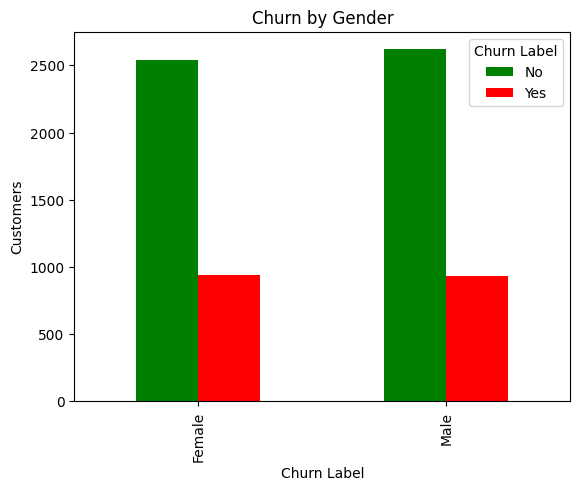

Percentage of Churn by female customers: 26.959517657192077
Percentage of Churn by male customers: 26.204564666103124


In [32]:
churn_by_gender=pd.crosstab(df["Gender"],df["Churn Label"])
female=churn_by_gender.loc['Female','No']
male=churn_by_gender.loc['Male','No']
female_churn=churn_by_gender.loc['Female','Yes']
male_churn=churn_by_gender.loc['Male','Yes']
female_churn=(female_churn/(female_churn+female))*100
male_churn=(male_churn/(male_churn+male))*100

churn_by_gender.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Gender')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
plt.show()
print(f"Percentage of Churn by female customers: {female_churn}")
print(f"Percentage of Churn by male customers: {male_churn}")

When we compare customer churn to ratio  of senior citizens, we can observe that senior citizens are more inclined towards churning as compared to younger customers

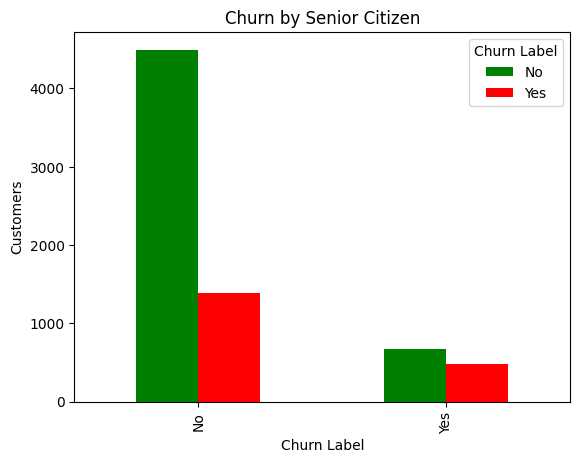

Percentage of Churn by Senior Citizen customers: 41.68126094570928
Percentage of Churn by Non Senior Citizen customers: 23.65025466893039


In [34]:
churn_by_sc=pd.crosstab(df["Senior Citizen"],df["Churn Label"])
sc_churn=churn_by_sc.loc['Yes','Yes']
non_sc_churn=churn_by_sc.loc['No','Yes']
sc=churn_by_sc.loc['Yes','No']
non_sc=churn_by_sc.loc['No','No']
sc_churn=(sc_churn/(sc+sc_churn))*100
non_sc_churn=(non_sc_churn/(non_sc_churn+non_sc))*100
churn_by_sc.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Senior Citizen')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
plt.show()
print(f"Percentage of Churn by Senior Citizen customers: {sc_churn}")
print(f"Percentage of Churn by Non Senior Citizen customers: {non_sc_churn}")

This vizulaization shows us that most of the customers  become churners just after a month which caues low monthky charges and low total charges

 we also see that amost 55%  our customer  play around 50 to 100
 with 20% of customers opting for the basic tier packages
  

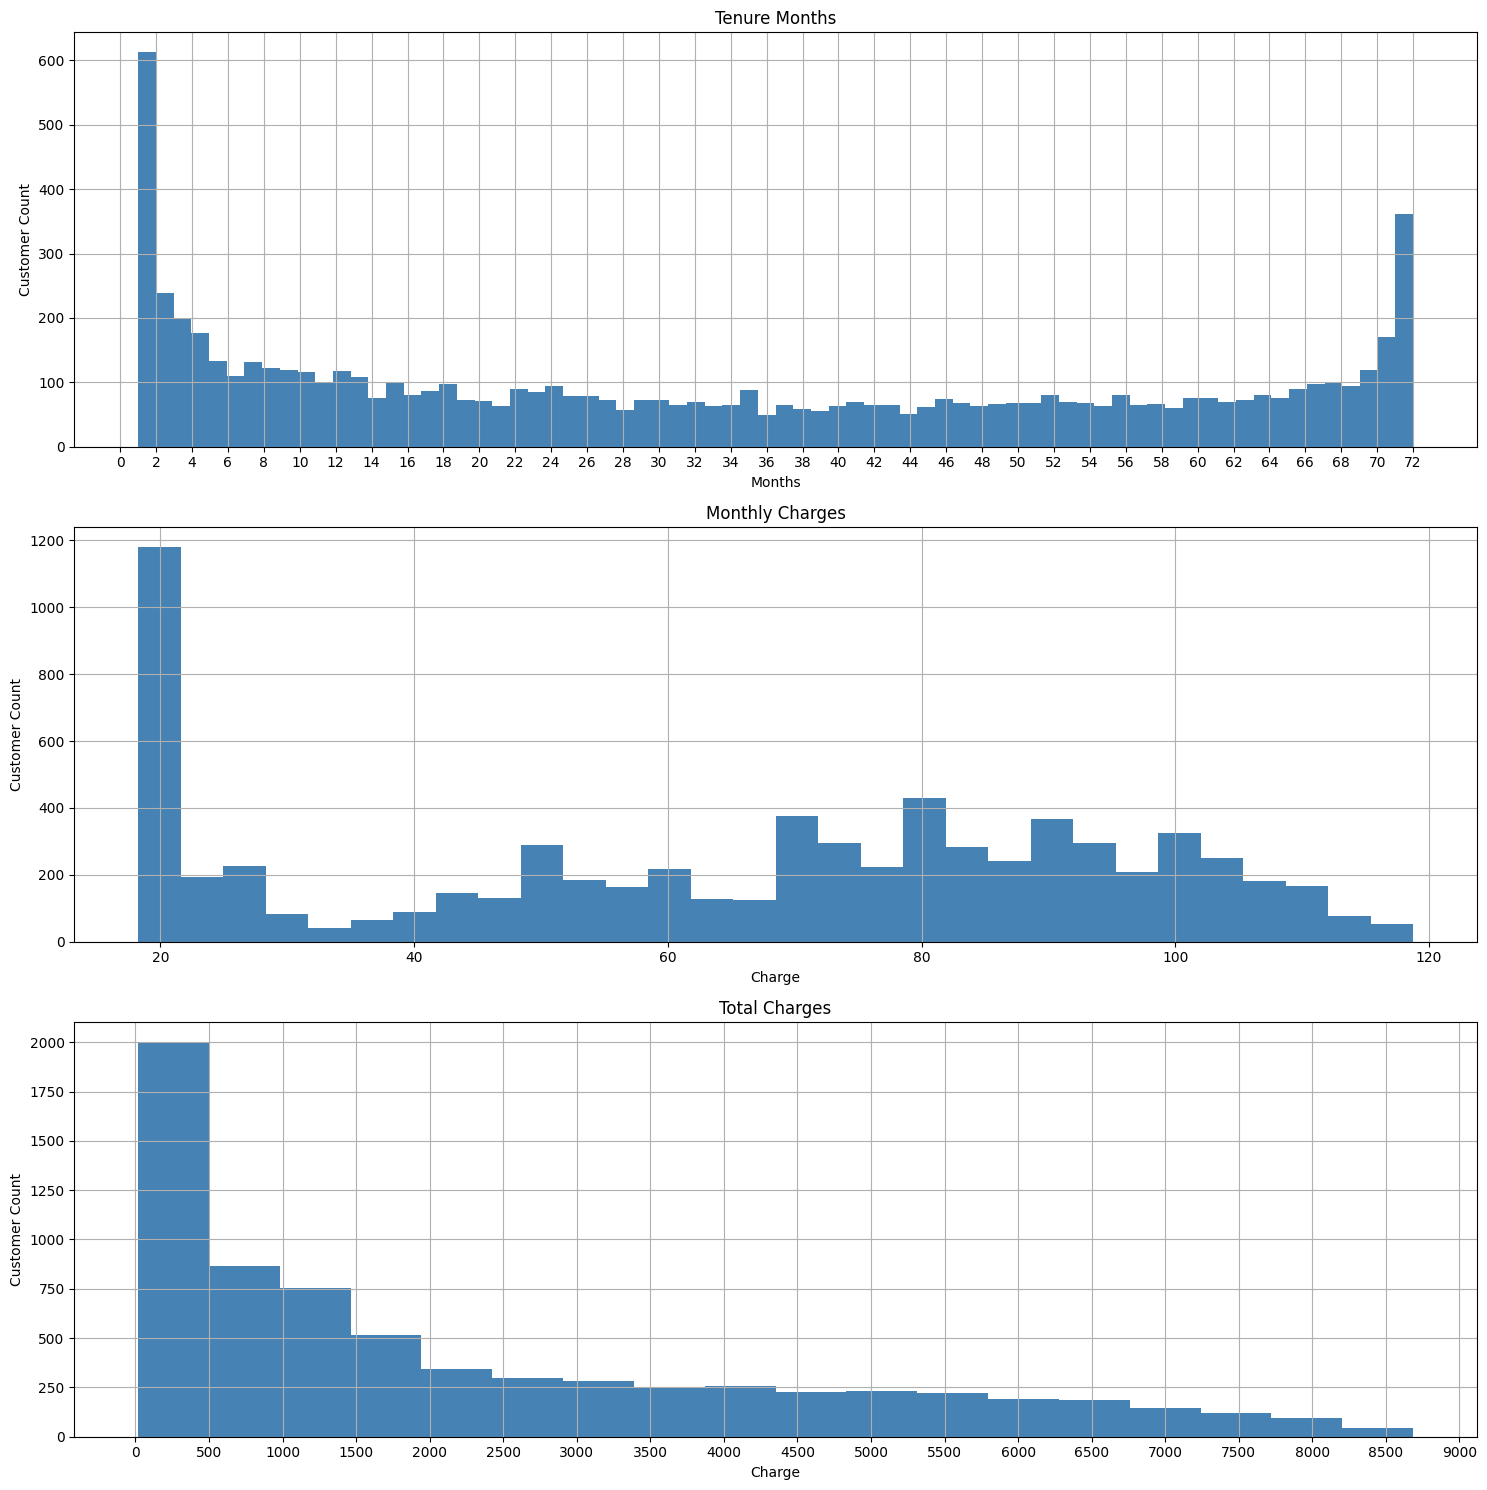

Monthly Charges
(0, 25]       19.937429
(25, 50]      12.670648
(50, 75]      23.037543
(75, 100]     31.527304
(100, 125]    12.827076
Name: proportion, dtype: float64


In [92]:
fig,axes= plt.subplots(3,1, figsize=(30,30))
df['Tenure Months'].hist(bins=72,figsize=(15,15),color='steelblue',ax=axes[0])
axes[0].set_title('Tenure Months')
axes[0].set_xticks(range(0,74,2))
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Customer Count')
df['Monthly Charges'].hist(bins=30,figsize=(15,15),color='steelblue',ax=axes[1])
axes[1].set_title('Monthly Charges')
axes[1].set_xlabel('Charge')
axes[1].set_ylabel('Customer Count')
df['Total Charges'].hist(bins=18,figsize=(15,15),color='steelblue',ax=axes[2])
axes[2].set_title('Total Charges')
axes[2].set_xticks(range(0,9500,500))
axes[2].set_xlabel('Charge')
axes[2].set_ylabel('Customer Count')
plt.tight_layout()
plt.show()
bin_percent_mc=pd.cut(df["Monthly Charges"],bins=range(0,140,25)).value_counts(normalize=True).sort_index()*100
print(bin_percent_mc)


In [ ]:
sns.